In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

import scipy.integrate as integrate
from sympy import Symbol, pi, atan, factor, lambdify

import sstats.hfreq as hf
import sstats.tseries as ts


In [2]:
models = ['exponential', 'gaussian']
U = {m: hf.high_frequency_signal(model=m) for m in models}

In [16]:
U_stat = {m: hf.high_frequency_signal(model=m,stationary=True) for m in models}

In [17]:
u = U['exponential']
u_stat = U_stat['exponential']

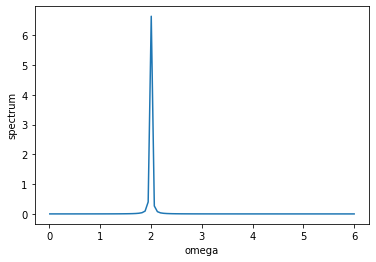

In [19]:
u_stat.evaluate_spectrum().plot()

Text(0.5, 1.0, 'Semidiurnal spectral peak')

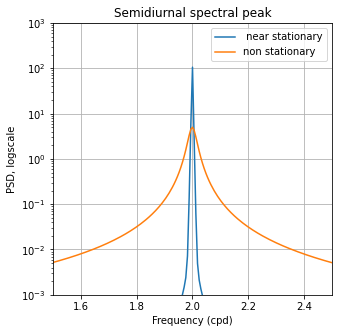

In [61]:
# for multiple parameter values:


fig, axes = plt.subplots(1,1,figsize=(5,5))
ax = axes
#ax = axes[0]
#for m, u in U.items():
T = 10000
E = u_stat.evaluate_spectrum(T=T,omega=dict(N=1000))
E.plot(ax=ax, label=r" near stationary")

T = 10.
E = u.evaluate_spectrum(T=T, omega=dict(N=1000))
E.plot(ax=ax,label="non stationary")

ax.set_yscale('log')
ax.set_xlim(1.5, 2.5)
ax.set_ylim(1e-3, 1e3)
ax.legend()
ax.grid();ax.set_ylabel('PSD, logscale');
ax.set_xlabel('Frequency (cpd)')
ax.set_title('Semidiurnal spectral peak')

In [73]:
rad = 2*np.pi
p = dict(U=1., Us=1., T=5., sigma=1.98*rad)
u_stat.generate_tseries(params=p, 
                         seed=0,
                         time=(1000,1/24),
                         draws=100,rms = p['U']
                        ).persist()


KeyError: 'rms'

In [47]:
u_stat.analytical_spectrum

T*U**2*(T**2*(omega**2 + sigma**2) + 1)/(T**4*(-omega**2 + sigma**2)**2 + 2*T**2*(omega**2 + sigma**2) + 1) + pi*U_s**2*(DiracDelta(-omega + sigma) + DiracDelta(omega + sigma))/2

In [49]:
u_stat_lbd = lambdify([u_stat.omega, u_stat.p['U'], u_stat.p['T'], u_stat.p['sigma']], u_stat.spectrum)

In [31]:
u_lbd = lambdify([u.omega, u.p['U'], u.p['T'], u.p['sigma']], u.spectrum)

In [32]:
u.p_values

{'T': 10, 'U': 1.0, 'sigma': 12.566370614359172}

In [50]:
omega = np.linspace(1,3,1000)

In [51]:
u_spectra = u_lbd(2*np.pi*omega,u.p_values['U'],u.p_values['T'],u.p_values['sigma'])

In [52]:
u_stat_spectra = u_stat_lbd(2*np.pi*omega,u_stat.p_values['U'],u_stat.p_values['T'],u_stat.p_values['sigma'])

NameError: name 'DiracDelta' is not defined

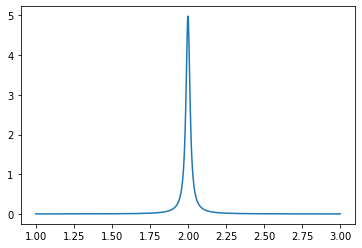

In [46]:
plt.plot(omega,u_spectra)